In [1]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
import os
print(os.listdir("input"))

['00 train test valid Code For Exergy.ipynb', '00 train test valid Code For HHV.ipynb', '00 train test valid Code For PCC.ipynb', '00 train test valid Code For Power1.ipynb', '00 train test valid First 8 Algorithm hydrogen.ipynb', '00 train test valid hydrogen2.ipynb', '00 train test valid Power 2 MLP-XGB.ipynb', 'DATAA.csv', 'DATAB.csv', 'DATAC.csv']


In [2]:
data= pd.read_csv("input/DATAA.csv")
data.head()

,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T,LNG_MF,H2_P,CO2_P,POWER,PCC_P,EXERGY,HHV
0,47.9,6.3,0.32,0.01,44.27,1.2,300,500,640,750,700,1000,310,700,82.575165,382.298959,229.700598,1350.8379,331.935067,9115.993
1,47.9,6.3,0.32,0.01,44.27,1.2,300,500,640,750,700,1000,310,800,82.575165,437.164581,250.991074,1350.8379,331.935067,9115.993
2,47.9,6.3,0.32,0.01,44.27,1.2,300,500,640,750,700,1000,310,900,82.575165,492.030203,272.277819,1350.8379,331.935067,9115.993
3,47.9,6.3,0.32,0.01,44.27,1.2,300,500,640,750,700,1000,310,1000,82.575165,546.895824,293.561646,1350.8379,331.935067,9115.993
4,47.9,6.3,0.32,0.01,44.27,1.2,300,500,640,750,700,1000,310,1100,82.575165,601.761446,314.843148,1350.8379,331.935067,9115.993


In [3]:
data=data.sample(n=14000000, replace=True,random_state=40)

In [4]:
print('The number of rows in dataset is - ' , data.shape[0])
print('The number of columns in dataset is - ' , data.shape[1])

The number of rows in dataset is -  14000000
The number of columns in dataset is -  20


In [5]:
data.isnull().sum().sort_values(ascending = True)

Carbon        0
PCC_P         0
POWER         0
CO2_P         0
H2_P          0
LNG_MF        0
CARBONAT_T    0
CAOH2         0
Water_WGS     0
GASIF_T       0
PYROL_T       0
Steam_MF      0
Air_MF        0
Ash           0
Oxygen        0
Sulfur        0
Nitrogen      0
Hydrogen      0
EXERGY        0
HHV           0
dtype: int64

In [6]:
data = data.dropna()

In [7]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data,test_size=0.20,random_state=40)
train, valid=train_test_split(train, test_size=0.125, random_state=40)

In [8]:
train.describe()

,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T,LNG_MF,H2_P,CO2_P,POWER,PCC_P,EXERGY,HHV
count,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06
mean,5.073403e+01,6.357678e+00,6.836326e-01,3.139644e-01,3.621748e+01,5.388165e+00,3.768833e+02,7.640751e+02,4.935519e+02,8.394005e+02,8.845259e+02,1.940772e+03,5.011099e+02,1.060035e+03,1.304881e+02,5.316594e+02,3.757400e+02,2.618043e+03,4.513303e+02,8.835112e+03
std,1.246388e+01,1.101738e+00,6.697436e-01,5.978483e-01,1.380155e+01,6.530796e+00,5.881352e+01,2.051668e+02,8.871008e+01,6.998584e+01,1.485544e+02,7.347840e+02,1.266483e+02,2.257114e+02,4.134890e+01,1.636060e+02,7.081412e+01,9.911687e+02,8.658797e+01,2.038003e+03
min,2.885000e+01,3.685500e+00,0.000000e+00,0.000000e+00,3.160000e+00,2.000000e-01,3.000000e+02,5.000000e+02,3.700000e+02,7.000000e+02,6.100000e+02,3.080000e+02,3.100000e+02,6.000000e+02,3.397155e+01,0.000000e+00,1.708610e+02,3.709994e+02,2.472574e+02,4.366628e+03
25%,4.585000e+01,5.850000e+00,3.500000e-01,0.000000e+00,3.712170e+01,2.870000e+00,3.350000e+02,5.700000e+02,4.100000e+02,7.750000e+02,7.500000e+02,1.250000e+03,3.740000e+02,9.000000e+02,1.055915e+02,4.371646e+02,3.259812e+02,1.688547e+03,3.854768e+02,7.579525e+03
50%,4.790000e+01,6.130000e+00,4.000000e-01,0.000000e+00,4.200000e+01,3.200000e+00,3.700000e+02,7.900000e+02,4.900000e+02,8.500000e+02,8.550000e+02,1.900000e+03,5.020000e+02,1.100000e+03,1.259394e+02,5.468958e+02,3.756242e+02,2.566592e+03,4.421904e+02,8.349717e+03
75%,5.022000e+01,7.430000e+00,1.280000e+00,1.100000e-01,4.480000e+01,7.100000e+00,4.400000e+02,9.000000e+02,5.500000e+02,9.000000e+02,9.500000e+02,2.500000e+03,6.300000e+02,1.300000e+03,1.466632e+02,6.566271e+02,4.287083e+02,3.377095e+03,5.089730e+02,9.239615e+03
max,8.027000e+01,8.131200e+00,3.685500e+00,1.813500e+00,4.543000e+01,4.150000e+01,4.750000e+02,1.100000e+03,6.500000e+02,9.750000e+02,1.200000e+03,3.400000e+03,6.940000e+02,1.400000e+03,3.063698e+02,7.665257e+02,5.730766e+02,4.592849e+03,7.313827e+02,1.558403e+04


In [9]:
test.describe()

,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T,LNG_MF,H2_P,CO2_P,POWER,PCC_P,EXERGY,HHV
count,2.800000e+06,2.800000e+06,2.800000e+06,2.800000e+06,2.800000e+06,2.800000e+06,2.800000e+06,2.800000e+06,2.800000e+06,2.800000e+06,2.800000e+06,2.800000e+06,2.800000e+06,2.800000e+06,2.800000e+06,2.800000e+06,2.800000e+06,2.800000e+06,2.800000e+06,2.800000e+06
mean,5.073223e+01,6.357268e+00,6.842195e-01,3.142033e-01,3.621320e+01,5.390684e+00,3.769029e+02,7.639171e+02,4.935451e+02,8.394322e+02,8.843573e+02,1.941200e+03,5.012421e+02,1.059917e+03,1.304891e+02,5.316005e+02,3.757498e+02,2.618612e+03,4.512885e+02,8.835861e+03
std,1.246673e+01,1.102640e+00,6.694934e-01,5.978500e-01,1.380047e+01,6.528400e+00,5.883965e+01,2.051812e+02,8.871853e+01,7.000108e+01,1.485141e+02,7.341667e+02,1.266764e+02,2.257368e+02,4.132918e+01,1.636401e+02,7.076834e+01,9.903449e+02,8.656169e+01,2.039051e+03
min,2.885000e+01,3.685500e+00,0.000000e+00,0.000000e+00,3.160000e+00,2.000000e-01,3.000000e+02,5.000000e+02,3.700000e+02,7.000000e+02,6.100000e+02,3.080000e+02,3.100000e+02,6.000000e+02,3.460580e+01,0.000000e+00,1.708589e+02,3.709642e+02,2.472574e+02,4.366628e+03
25%,4.585000e+01,5.850000e+00,3.500000e-01,0.000000e+00,3.712170e+01,2.870000e+00,3.350000e+02,5.700000e+02,4.100000e+02,7.750000e+02,7.500000e+02,1.250000e+03,3.740000e+02,9.000000e+02,1.056363e+02,4.371646e+02,3.259812e+02,1.688547e+03,3.855058e+02,7.579628e+03
50%,4.790000e+01,6.130000e+00,4.000000e-01,0.000000e+00,4.200000e+01,3.200000e+00,3.700000e+02,7.900000e+02,4.900000e+02,8.500000e+02,8.550000e+02,1.900000e+03,5.020000e+02,1.100000e+03,1.259498e+02,5.468958e+02,3.756242e+02,2.566592e+03,4.421768e+02,8.350085e+03
75%,5.022000e+01,7.430000e+00,1.280000e+00,1.100000e-01,4.480000e+01,7.100000e+00,4.400000e+02,9.000000e+02,5.500000e+02,9.000000e+02,9.500000e+02,2.500000e+03,6.300000e+02,1.300000e+03,1.466901e+02,6.566271e+02,4.287245e+02,3.377095e+03,5.089044e+02,9.240596e+03
max,8.027000e+01,8.131200e+00,3.685500e+00,1.813500e+00,4.543000e+01,4.150000e+01,4.750000e+02,1.100000e+03,6.500000e+02,9.750000e+02,1.200000e+03,3.400000e+03,6.940000e+02,1.400000e+03,3.061818e+02,7.663591e+02,5.730766e+02,4.592849e+03,7.313827e+02,1.558403e+04


In [10]:
col_randoms = ["Carbon", "Hydrogen","Nitrogen","Sulfur","Oxygen","Ash","Air_MF","Steam_MF","PYROL_T", "GASIF_T"]
col_target = ["EXERGY"]

In [11]:
feature_vars = train[col_randoms ]
target_vars = train[col_target]
feature_vars.shape
target_vars.shape

(9800000, 1)

In [12]:
feature_vars.describe()

,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T
count,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06
mean,5.073403e+01,6.357678e+00,6.836326e-01,3.139644e-01,3.621748e+01,5.388165e+00,3.768833e+02,7.640751e+02,4.935519e+02,8.394005e+02
std,1.246388e+01,1.101738e+00,6.697436e-01,5.978483e-01,1.380155e+01,6.530796e+00,5.881352e+01,2.051668e+02,8.871008e+01,6.998584e+01
min,2.885000e+01,3.685500e+00,0.000000e+00,0.000000e+00,3.160000e+00,2.000000e-01,3.000000e+02,5.000000e+02,3.700000e+02,7.000000e+02
25%,4.585000e+01,5.850000e+00,3.500000e-01,0.000000e+00,3.712170e+01,2.870000e+00,3.350000e+02,5.700000e+02,4.100000e+02,7.750000e+02
50%,4.790000e+01,6.130000e+00,4.000000e-01,0.000000e+00,4.200000e+01,3.200000e+00,3.700000e+02,7.900000e+02,4.900000e+02,8.500000e+02
75%,5.022000e+01,7.430000e+00,1.280000e+00,1.100000e-01,4.480000e+01,7.100000e+00,4.400000e+02,9.000000e+02,5.500000e+02,9.000000e+02
max,8.027000e+01,8.131200e+00,3.685500e+00,1.813500e+00,4.543000e+01,4.150000e+01,4.750000e+02,1.100000e+03,6.500000e+02,9.750000e+02


In [13]:
target_vars.describe()

,EXERGY
count,9.800000e+06
mean,4.513303e+02
std,8.658797e+01
min,2.472574e+02
25%,3.854768e+02
50%,4.421904e+02
75%,5.089730e+02
max,7.313827e+02


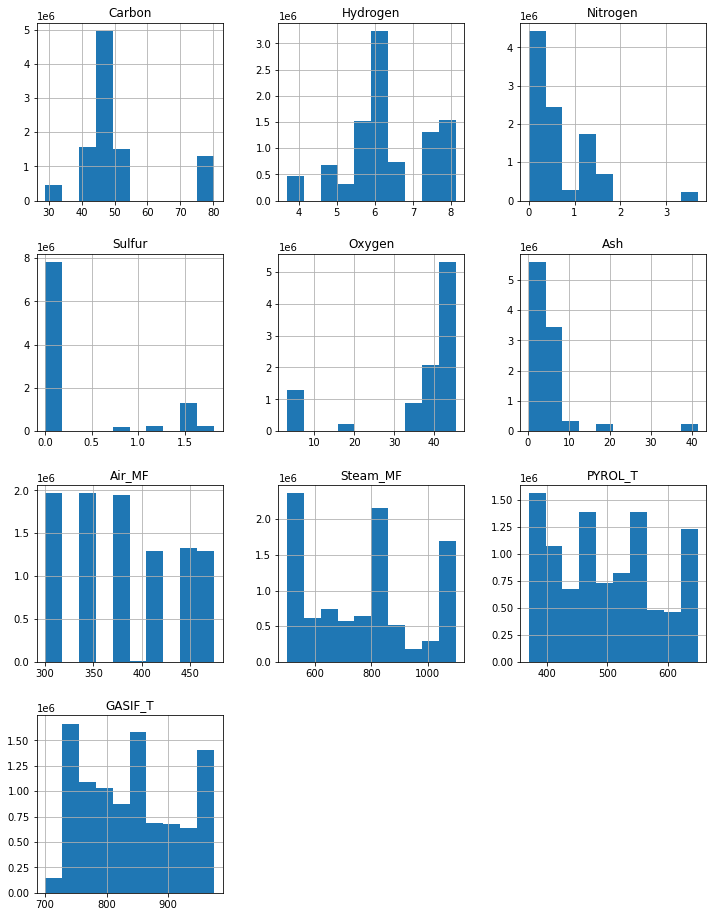

In [14]:
feature_vars.hist(bins = 10 , figsize= (12,16)) ;
plt.savefig("out.png")

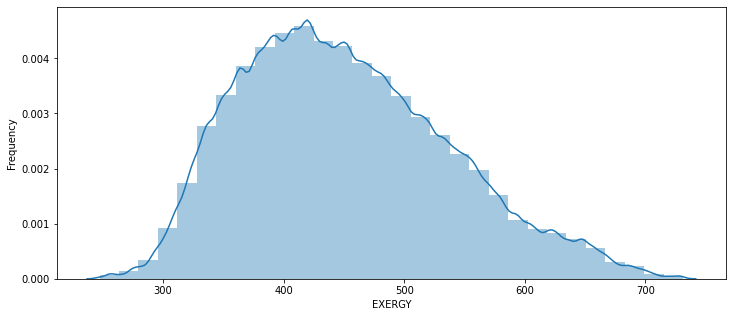

In [15]:
f = plt.figure(figsize=(12,5))
plt.xlabel('kg/hr')
plt.ylabel('Frequency')
sns.distplot(target_vars.EXERGY , bins=30 ) ;

<AxesSubplot:>

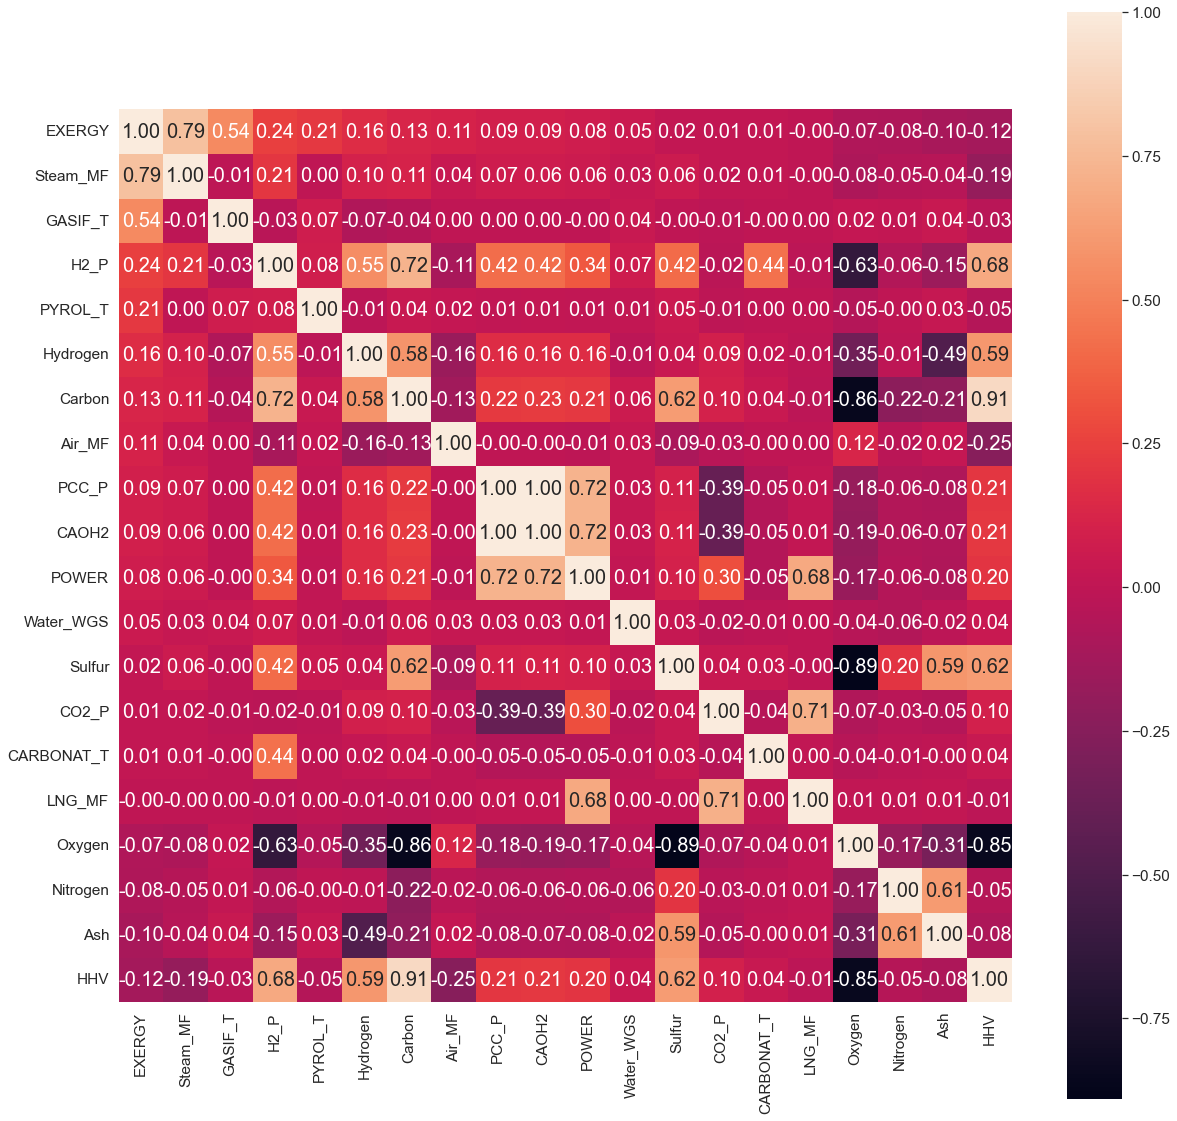

In [16]:
from matplotlib import rcParams
train_corr = train[col_randoms]
rcParams['figure.figsize'] = 20,20
corr_matrix = train.corr()
column_ind = corr_matrix.nlargest(20, 'EXERGY')['EXERGY'].index
cm = np.corrcoef(train[column_ind].values.T)
sns.set(font_scale=1.4)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 20}, yticklabels=column_ind.values, xticklabels=column_ind.values)

In [17]:
train_X = train[col_randoms]
train_y = train[col_target]
train_X.shape

(9800000, 10)

In [18]:
test_X = test[col_randoms]
test_y = test[col_target]
test_X.shape

(2800000, 10)

In [19]:
valid_X = valid[col_randoms]
valid_y = valid[col_target]
valid_X.shape

(1400000, 10)

In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
train = train[list(train_X.columns.values)]
test = test[list(test_X.columns.values)]
##
valid=valid[list(valid_X.columns.values)]
##
sc_train = pd.DataFrame(columns=train.columns , index=train.index)
sc_train[sc_train.columns] = sc.fit_transform(train)
sc_test= pd.DataFrame(columns=test.columns , index=test.index)
sc_test[sc_test.columns] = sc.fit_transform(test)

sc_valid=pd.DataFrame(columns=valid.columns, index=valid.index)
sc_valid[sc_valid.columns]=sc.fit_transform(valid)

In [21]:
sc_train.head()


,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T
3946963,-0.391855,-0.206654,-0.498150,-0.525157,0.621852,-0.385583,-1.307239,0.175101,-0.772763,-0.562978
11714035,-1.620445,-2.425421,4.482115,2.508221,-1.263552,5.529470,1.668268,-0.068603,1.650862,1.580313
11036878,-1.755796,-2.176269,-0.005424,1.431861,0.667499,2.223594,-1.307239,-0.507270,-1.054580,-0.920194
12209073,2.369724,0.973300,-0.333908,2.117654,-2.395200,0.262117,-0.712138,1.637326,1.650862,0.151452
7124077,-0.817084,-1.032622,-0.423494,-0.525157,0.667499,0.461174,0.478065,-1.140901,0.974502,0.508667


In [22]:
sc_test.head()

,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T
4515303,-0.391621,-0.206112,-0.499213,-0.525555,0.622210,-0.386111,-1.306992,0.175859,0.320733,0.793814
10652801,-0.099644,0.274552,0.232684,-0.408469,0.419319,-0.681742,-0.712155,-0.725784,0.974486,1.222378
291521,-0.227183,-0.051937,-0.544023,-0.508829,0.583806,-0.641916,1.072356,1.637981,1.650782,-0.920446
9481896,0.254972,-0.226989,-0.483708,-0.525555,0.065831,-0.442786,0.477519,1.637981,-0.378107,1.579516
9364153,0.254972,-0.226989,-0.483708,-0.525555,0.065831,-0.442786,1.072356,0.906920,-1.392551,-0.206171


In [23]:
train_y.head()

,EXERGY
3946963,412.134499
11714035,491.363255
11036878,338.955435
12209073,625.689187
7124077,403.635150


In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
models = [
           ['RandomForest ',RandomForestRegressor()],
         ]

In [26]:
import time
from math import sqrt
from sklearn.metrics import mean_squared_error

model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 80
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(train_X,train_y)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = metrics.r2_score(train_y,curr_model.predict(train_X))
    curr_model_data["Test_R2_Score"] = metrics.r2_score(test_y,curr_model.predict(test_X))
    curr_model_data["Valid_R2_Score"]=metrics.r2_score(valid_y, curr_model.predict(valid_X))
    curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(test_y,curr_model.predict(test_X)))
    curr_model_data["Valid_RMSE_Score"] = sqrt(mean_squared_error(valid_y,curr_model.predict(valid_X)))

    model_data.append(curr_model_data)

In [27]:
model_data

[{'Name': 'RandomForest ',
  'Train_Time': 3206.1988055706024,
  'Train_R2_Score': 0.9999999997769663,
  'Test_R2_Score': 0.9999999994641788,
  'Valid_R2_Score': 0.9999999986452757,
  'Test_RMSE_Score': 0.0020037132610158173,
  'Valid_RMSE_Score': 0.0031862513767063525}]

In [28]:
df = pd.DataFrame(model_data)
df

,Name,Train_Time,Train_R2_Score,Test_R2_Score,Valid_R2_Score,Test_RMSE_Score,Valid_RMSE_Score
0,RandomForest,3206.198806,1.0,1.0,1.0,0.002004,0.003186


In [29]:
from plotly.offline import  init_notebook_mode
init_notebook_mode(connected=True)
from sklearn.model_selection import GridSearchCV
param_grid = [{
              'max_depth': [80,150],
              'n_estimators' : [100,200],
              'max_features': ["auto", "sqrt", "log2"]
            }]
reg = RandomForestRegressor(random_state=40)
grid_search = GridSearchCV(estimator = reg, param_grid = param_grid, cv = 5, n_jobs = -1 , scoring='r2' , verbose=2)
grid_search.fit(train_X, train_y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=40), n_jobs=-1,
             param_grid=[{'max_depth': [80, 150],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [100, 200]}],
             scoring='r2', verbose=2)

In [30]:
grid_search.best_params_

{'max_depth': 80, 'max_features': 'sqrt', 'n_estimators': 200}

In [31]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=80, max_features='sqrt', n_estimators=200,
                      random_state=40)

In [32]:
grid_search.best_estimator_.score(train_X,train_y)

0.9999999993282865

In [33]:
grid_search.best_estimator_.score(test_X,test_y)

0.999999999278954

In [34]:
np.sqrt(mean_squared_error(test_y, grid_search.best_estimator_.predict(test_X)))

0.0023243800611657257

In [35]:
feature_indices = np.argsort(grid_search.best_estimator_.feature_importances_)

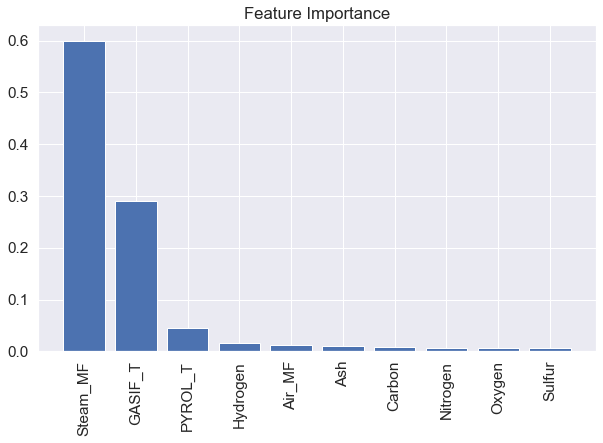

In [36]:
importances = grid_search.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
names = [train_X.columns[i] for i in indices]
plt.figure(figsize=(10,6))
plt.title("Feature Importance")
plt.bar(range(train_X.shape[1]), importances[indices])
plt.xticks(range(train_X.shape[1]), names, rotation=90)
plt.show()

In [37]:
names[0:5]

['Steam_MF', 'GASIF_T', 'PYROL_T', 'Hydrogen', 'Air_MF']

In [38]:
train_important_feature = train_X[names[0:5]]
test_important_feature = test_X[names[0:5]]

In [39]:
from sklearn.base import clone
cloned_model = clone(grid_search.best_estimator_)
cloned_model.fit(train_important_feature , train_y)

RandomForestRegressor(max_depth=80, max_features='sqrt', n_estimators=200,
                      random_state=40)

In [40]:
print('Training set R2 Score - ', metrics.r2_score(train_y,cloned_model.predict(train_important_feature)))
print('Testing set R2 Score - ', metrics.r2_score(test_y,cloned_model.predict(test_important_feature)))
print('Testing set RMSE Score - ', np.sqrt(mean_squared_error(test_y, cloned_model.predict(test_important_feature))))

Training set R2 Score -  0.9999999995690191
Testing set R2 Score -  0.999999999486052
Testing set RMSE Score -  0.001962389567646176


In [41]:
df = pd.DataFrame(model_data)
df

,Name,Train_Time,Train_R2_Score,Test_R2_Score,Valid_R2_Score,Test_RMSE_Score,Valid_RMSE_Score
0,RandomForest,3206.198806,1.0,1.0,1.0,0.002004,0.003186
